
# V2 Test Section

test kromosom integer sampe 100

global Variables and Modules

In [1]:
import math
import random
import copy
import matplotlib.pyplot as plt


# """
# global variable tracker :
# gtype_len
# enkode
# population_size
# cross_prob
# mutate_prob
# """


Class to make an individiual with kromosom and already calculated fitness

In [2]:
class individu(object) :

  def __init__(self,kromosom) :
    """ Inisialisasi suatu individu, masukin argumen ke parameter kromosom
    nanti dia punya kromosom itu. fitness otomatis nyari dari function fit(self)"""
    self.kromosom = kromosom
    self.fitness = self.fit()
  
  @classmethod #classmethod buat bikin gen random atau buat mutasi
  def create_genv1(self) :
    """ ambil bilangan integer dari 0 s/d 9 untuk dijadikan gen dari genotype"""
    gene = random.randint(0,9)
    return gene
  
  @classmethod #classmethod buat bikin gen random atau buat mutasi v2 untuk tanpa encoding gajelas
  def create_genv2(self) :
    """ ambil bilangan real dari -5 s/d 5 untuk dijadikan gen dari genotype"""
    gene = random.uniform(-5,5)
    return gene
  
  @classmethod #classmethod untuk membuat genotype ex : [0.47, 0.08, 0.13, 0.73, 0.92, 0.66]
  def create_genotype(self) :
    """membuat genotype x1 x2, direpresentasikan oleh array dimana setengah pertama adalah x1,
    setengah kedua adalah x2""" 
    global gtype_len
    global enkode
    if enkode == "true" :
      return [self.create_genv1() for _ in range(gtype_len)] #kalau genotype di enkoding jadi representasi lain, maka gen create random dengan representasi
    else :
      return [self.create_genv2() for _ in range(gtype_len)] #kalau genotype tidak enkoding jadi representasi lain, maka gen create random x dan y langsung

  def decode_gen(self,fheno) :
    """dekoding genotype x1 menjadi fhenotype nya"""
    g = self.kromosom
    global gtype_len
    N = int(gtype_len / 2)
    summation = 0
    gn = 0
    if fheno == "x" : #kalau nyari x, mulai array/list dari 0
      n = 0
      nn = 0
    else : #kalau nyari y, mulai array dari setengah + 1
      n = N
      nn = N
    for i in range(0,N) :
      summation += 10**(-1 * (i+1)) #bagian pembagi di rumus decoding
      gn += g[n] * (10**(-1 * (i+1))) #bagian pengkali di rumus decoding
      n+=1
    decoded = -5 + ((5-(-5))/(summation*9)) * gn #hasil akhir rumus h(x,y)
    if enkode == "true" :
      return decoded #kalau di enkode, return hasil rumus
    else :
      return g[nn] #kalau tidak enkode, return langsung gen nya karna sdh langsung nilai x/y nya

  def fit(self) : #def mencari fitness
    """dekode genotype x1,x2 jika perlu untuk mencari fitness yang aslinya"""
    global enkode
    if enkode == "true" :
      fhenox = self.decode_gen("x") #decode gen dari representasi kromosom menjadi x
      fhenoy = self.decode_gen("y") #decode gen dari representasi kromosom menjadi y
    else :
      fhenox = self.kromosom[0] #array[0] dari kromosom adalah x
      fhenoy = self.kromosom[1] #array[1] dari kromosom adalah y
    h = ( (math.cos(fhenox) + math.sin(fhenoy))**2 / (fhenox**2 + fhenoy**2) ) #rumus h(x,y)
    return 1/(h) #return kebalikan h karena ingin hasil fungsi atau h menjadi minimum

# Functions

membuat populasi dengan individu yang berkromosom random

In [3]:
def generate_population(populasi) :
  global population_size 
  for _ in range(0,population_size) : #loop dari 0 sampai ukuran populasi
    populasi.append(individu(individu.create_genotype())) #membuat individu baru, lalu dimasukkan kedalam array populasi

# enkode = input('Di enkode? true false? : ')
# if enkode == "true" :
#   gtype_len = int(input('panjang genotype? : '))
# else :
#   gtype_len = 2
# population_size = int(input('banyak populasi? : '))

# population = []
# generate_population(population)

# for i in range(0,population_size) :
#   print("Individu ke-{}\t kromosom {}\t fitness = {}".\
#         format(i+1,population[i].kromosom,population[i].fitness))

mencari max dan min dari populasi

In [4]:
def maxfit(populasi) :
  idxmax = 0
  for i in range(0,population_size) : #loop dari 0 sampai ukuran populasi
    if populasi[i].fitness >= populasi[idxmax].fitness : #kalau fitness i terloop lebih besar dari fitness max sebelumnya, swap
      idxmax = i
  return idxmax

def minfit(populasi) : 
  idxmin = 0
  for i in range(0,population_size) : #loop dari 0 sampai ukuran populasi
    if populasi[i].fitness <= populasi[idxmin].fitness : #kalau fitness i terloop lebih kecil dari fitness min sebelumnya, swap
      idxmin = i
  return idxmin

# print("Individu terbaik {} dengan fitness {}\nIndividu terburuk {} dengan fitness {}".\
#       format(population[maxfit(population)].kromosom,population[maxfit(population)].fitness,population[minfit(population)].kromosom, population[minfit(population)].fitness))

Mengseleksi parent dari populasi melalui suatu metode

In [5]:
def seleksi_parent(populasi) :
  allfit = 0 #init total fitness populasi
  for i in range(0,population_size) : 
    allfit += populasi[i].fitness #increment total fitness populasi dengan fitness tiap individu di populasi
  r = random.random()
  individu_ke = 0
  r -= populasi[individu_ke].fitness / allfit #melakukan seleksi roulette dengan cara kurangi angka random dengan (fitness tiap individu dibagi fitness total) sampai < 0
  while r > 0:
    individu_ke += 1
    r -= populasi[individu_ke].fitness / allfit
  temp = copy.deepcopy(populasi[individu_ke]) #copy individu ke variabel lain agar tidak bentrok
  return temp

# par1, par2 = seleksi_parent(population), seleksi_parent(population)
# print("Parent 1 {} dengan fitness {}\nParent 2 {} dengan fitness {}".\
#       format(par1.kromosom, par1.fitness, par2.kromosom, par2.fitness))

mating secara cross dengan menghasilkan dua offspring

In [6]:
def mating_cross(par1, par2) :
  global cross_prob
  global gtype_len
  prob = random.random()
  temp1,temp2 = par1.kromosom.copy(), par2.kromosom.copy() #copy agar tidak bentrok
  if prob < cross_prob : #jika angka random penentu lebih kecil dari probabilitas mating cross, jalan
    rand = random.randint(1,gtype_len-1) #random angka untuk menentukan titik cross
    for i in range(rand,gtype_len) : #swap antar parent
      temp = par1.kromosom[i]
      par1.kromosom[i] = par2.kromosom[i]
      par2.kromosom[i] = temp
    offspring1, offspring2 = individu(par1.kromosom), individu(par2.kromosom) #buat individu baru dengan kromosom cross sebelumnya
    par1.kromosom, par2.kromosom = temp1.copy(), temp2.copy() #undo swap dengan cara copy
  else : #probabilitas tidak terpenuhi, anak adalah parent
    offspring1 = individu(par1.kromosom)
    offspring2 = individu(par2.kromosom)
    par1.kromosom, par2.kromosom = temp1.copy(), temp2.copy()
  return [offspring1,offspring2]
# cross_prob = float(input("probabilitas mating cross : "))
# child1,child2 = mating_cross(par1,par2)
# print("Child 1 {} dengan fitness {}\nChild 2 {} dengan fitness {}".\
#       format(child1.kromosom, child1.fitness, child2.kromosom, child2.fitness))

Child di mutasi jika probabilitas mutasi mencukupi

In [7]:
def mating_mutation(mutation) :
  global mutate_prob
  global enkode
  for i in range(0,len(mutation.kromosom)-1) : #loop sampai ujung kromosom
    krom_mutate = random.random()
    
    if krom_mutate < mutate_prob :
      
      if enkode == "true" :
        mutation.kromosom[i] = random.randint(0,9) #kalau probabilitas terpenuhi, dan di enkode, tukar gen dengan angka int random
      else :
        mutation.kromosom[i] = random.uniform(-5,5) #kalau probabilitas terpenuhi, dan tidak enkode, tukar gen dengan angka real random
  mutated = individu(mutation.kromosom)
  return mutated

# mutate_prob = 0.01
# mutated_child1, mutated_child2 = mating_mutation(child1), mating_mutation(child2)
# print("Child 1 {} dengan fitness {}\nChild 2 {} dengan fitness {}".\
#       format(mutated_child1.kromosom, mutated_child1.fitness, mutated_child2.kromosom, mutated_child2.fitness))

Elitisme memilih 2 individu terbaik untuk menjadi generasi selanjutnya

In [8]:
def elitism(populasi) :
  t1 = maxfit(populasi) #fitness tertinggi pertama
  temp, populasi[t1].fitness = populasi[t1].fitness, 0 #hapus dr populasi sesaat untuk mencari yg kedua
  t2 = maxfit(populasi) #fitness tertinggi kedua
  populasi[t1].fitness = temp #undo hapus
  elite1 = copy.deepcopy(populasi[t1])
  elite2 = copy.deepcopy(populasi[t2])
  return [elite1, elite2]

# elite1, elite2 = elitism(population)
# print("Individu terbaik 1 {} dengan fitness {}\nIndividu terbaik 2 {} dengan fitness {}".\
#       format(elite1.kromosom, elite1.fitness, elite2.kromosom, elite2.fitness))

Sorting algorithm untuk sort individu dari fitness terbesar

In [9]:
def selection_sort(populasi):
   for idx in range(len(populasi)):
      max_idx = idx
      for j in range( idx +1, len(populasi)):
         if populasi[max_idx].fitness < populasi[j].fitness:
          max_idx = j
# Swap the minimum value with the compared value
      populasi[idx], populasi[max_idx] = copy.deepcopy(populasi[max_idx]), copy.deepcopy(populasi[idx])

# enkode = "true"
# if enkode == "true" :
#   gtype_len = 10
# else :
#   gtype_len = 2
# population = []
# population_size = 10
# generate_population(population)
# for i in range(0,population_size) :
#   print("Individu ke-{}\t kromosom {}\t fitness = {}".\
#         format(i+1,population[i].kromosom,population[i].fitness))
# selection_sort(population)
# print("\n")
# for i in range(0,population_size) :
#   print("Individu ke-{}\t kromosom {}\t fitness = {}".\
#         format(i+1,population[i].kromosom,population[i].fitness))

Replace generasi lama dengan generasi baru

In [10]:
def generation_replace(populasi) :
  if not populasi :
    generate_population(populasi) #buat populasi jika kosong

  else :
    newPopulation = [] 
    newPopulation.extend(elitism(populasi)) #isi populasi baru dengan 2 individu terbaik
    while len(newPopulation) < population_size :
      par1,par2 = seleksi_parent(populasi), seleksi_parent(populasi)  #cari parent
      #print(par1.kromosom,par2.kromosom)
      offspring1, offspring2 = mating_cross(par1,par2) #cross kedua parent, dapat 2 anak
      offspring1, offspring2 = copy.deepcopy(mating_mutation(offspring1)), copy.deepcopy(mating_mutation(offspring2)) #2 anak dimutasi
      newPopulation.append(offspring1)
      newPopulation.append(offspring2) #masukkan anak2 baru
    populasi = newPopulation.copy() #overwrite populasi dengan yang baru

  return populasi

# population = generation_replace(population)
# for i in range(0,population_size) :
#   print("Individu ke-{0}\t kromosom {1}\t fitness = {2}\tNilai fungsi = {3:10.15f}".\
#         format(i+1,population[i].kromosom,population[i].fitness,(1/population[i].fitness)-1))

Kriteria pemberhentian generasi, generasi = 100

#Driver Code/ Main code 

Apakah kromosom di enkode ke representasi lain? true false? : true
Masukkan panjang genotype : 6
Masukkan banyak individu dalam 1 populasi : 10
Masukkan probabilitas mating cross : 0.5
Masukkan probabilitas mutasi : 0.1
Masukkan banyak generasi : 100

Generasi 1
Individu ke-1	 kromosom [6, 4, 0, 2, 9, 8]	x,y = (1.4064064064064077,-2.0170170170170167)	fitness = 11.088400836758789	Nilai fungsi = 0.090184329978849
Individu ke-2	 kromosom [9, 9, 6, 4, 3, 5]	x,y = (4.96996996996997,-0.6456456456456454)	fitness = 208.63466642489914	Nilai fungsi = 0.004793067313001
Individu ke-3	 kromosom [6, 8, 3, 6, 7, 0]	x,y = (1.836836836836837,1.7067067067067079)	fitness = 11.866675793923866	Nilai fungsi = 0.084269598105312
Individu ke-4	 kromosom [9, 6, 9, 7, 0, 3]	x,y = (4.6996996996997,2.037037037037038)	fitness = 33.835756622200414	Nilai fungsi = 0.029554533423493
Individu ke-5	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.0000

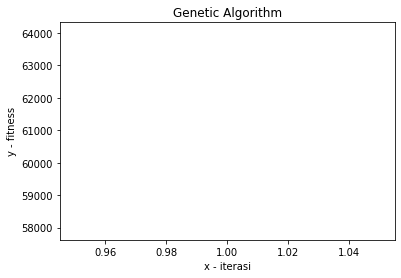


Generasi 2
Individu ke-1	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-2	 kromosom [2, 4, 5, 7, 4, 8]	x,y = (-2.5475475475475475,2.4874874874874884)	fitness = 261.37742639971964	Nilai fungsi = 0.003825885095642
Individu ke-3	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-4	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-5	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-6	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-7	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.927927927927927

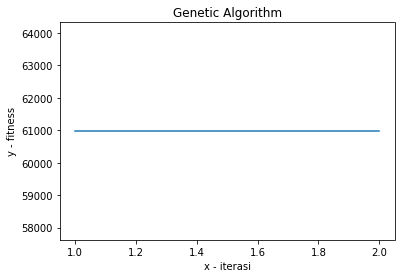


Generasi 3
Individu ke-1	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-2	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-3	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-4	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-5	 kromosom [0, 2, 5, 2, 0, 7]	x,y = (-4.74974974974975,-2.9279279279279278)	fitness = 1020.1878512389711	Nilai fungsi = 0.000980211633363
Individu ke-6	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-7	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278

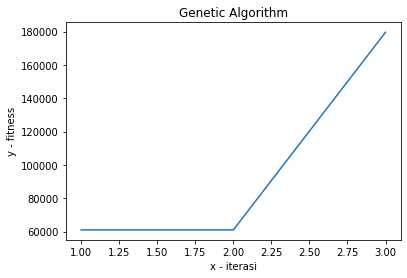


Generasi 4
Individu ke-1	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-2	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-3	 kromosom [0, 0, 5, 0, 0, 7]	x,y = (-4.94994994994995,-4.92992992992993)	fitness = 33.2383205045544	Nilai fungsi = 0.030085755983458
Individu ke-4	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-5	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-6	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-7	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	

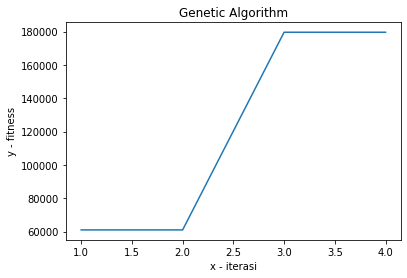


Generasi 5
Individu ke-1	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-2	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-3	 kromosom [5, 1, 6, 2, 0, 7]	x,y = (0.1651651651651651,-2.9279279279279278)	fitness = 14.342591077235026	Nilai fungsi = 0.069722408915864
Individu ke-4	 kromosom [6, 0, 5, 2, 0, 7]	x,y = (1.0560560560560566,-2.9279279279279278)	fitness = 123.33711031400243	Nilai fungsi = 0.008107859811650
Individu ke-5	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 2, 6, 2, 0, 7]	x,y = (-4.73973973973974,-2.92792792792

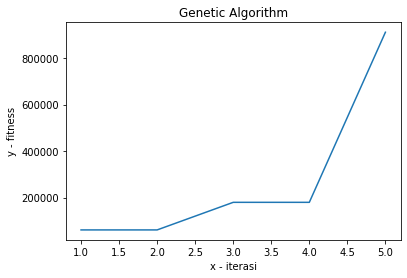


Generasi 6
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-7	 kromosom [0, 0, 6, 4, 0, 7]	x,y = (-4.93993993993994,-0.92592592592592

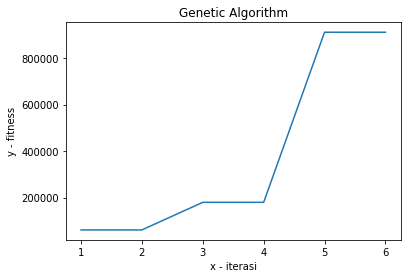


Generasi 7
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 0, 2, 0, 7]	x,y = (-5.0,-2.9279279279279278)	fitness = 65

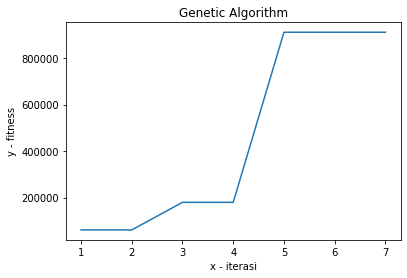


Generasi 8
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)

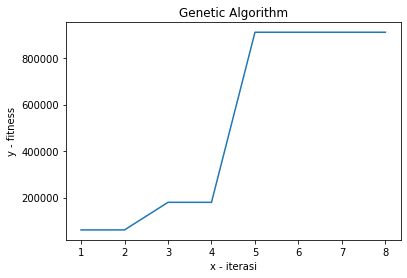


Generasi 9
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 1, 0, 7]	x,y = (-4.91991991991992,-3.928928928928929)	

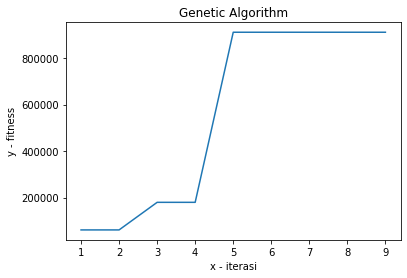


Generasi 10
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 1, 8, 2, 0, 7]	x,y = (-4.81981981981982,-2.9279279279279278)	fitness = 2894.668626595583	Nilai fungsi = 0.000345462686406
Individu ke-6	 kromosom [0, 0, 8, 2, 7, 7]	x,y = (-4.91991991991992,-2.227227227227227)	fitness = 84.89649057452469	Nilai fungsi = 0.011779049913991
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)

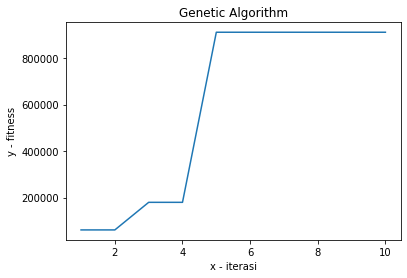


Generasi 11
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 6, 7]	x,y = (-4.91991991991992,-2.3273273273273274)	fitness = 109.05478715608966	Nilai fungsi = 0.009169702917935
Individu ke-7	 kromosom [7, 0, 8, 6, 0, 7]	x,y = (2.087087087087088,1.0760760760760766

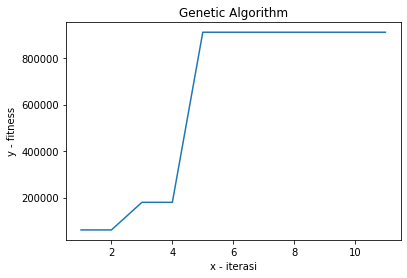


Generasi 12
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 2, 2, 0, 7]	x,y = (-4.97997997997998,-2.9279279279279278)	fitness = 12170.042227350259	Nilai fungsi = 0.000082168983584
Individu ke-7	 kromosom [0, 0, 8, 2, 4, 7]	x,y = (-4.91991991991992,-2.527527527527527

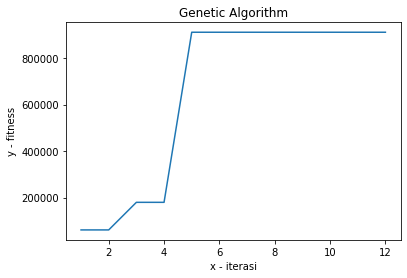


Generasi 13
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [6, 0, 8, 2, 0, 7]	x,y = (1.0860860860860875,-2.9279279279279278)	fitness = 151.269674095035	Nilai fungsi = 0.006610710348802
Individu ke-5	 kromosom [0, 0, 8, 2, 8, 7]	x,y = (-4.91991991991992,-2.127127127127127)	fitness = 69.45603068818907	Nilai fungsi = 0.014397597877272
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 4, 0, 0, 7]	x,y = (-4.95995995995996,-4.92992992992993)	f

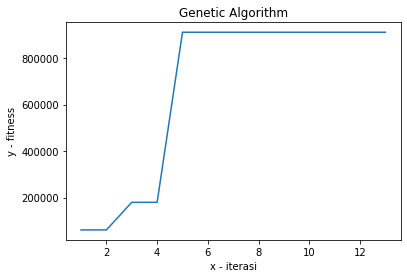


Generasi 14
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [1, 7, 8, 2, 0, 7]	x,y = (-3.218218218218218,-2.9279279279279278)	fitness = 12.948308324343193	Nilai fungsi = 0.077230165898967
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.92792792792792

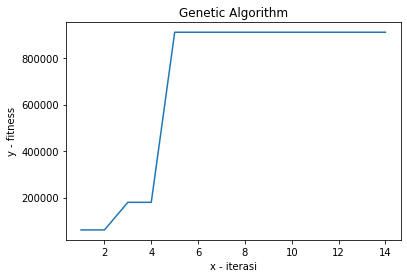


Generasi 15
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

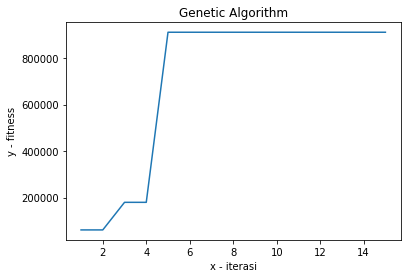


Generasi 16
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 6, 2, 4, 7]	x,y = (-4.93993993993994,-2.527527527527527)	fitness = 250.4953705335367	Nilai fungsi = 0.003992089745491
Individu ke-4	 kromosom [5, 0, 8, 2, 0, 7]	x,y = (0.08508508508508505,-2.9279279279279278)	fitness = 13.946939585898269	Nilai fungsi = 0.071700317753660
Individu ke-5	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 4, 7]	x,y = (-4.91991991991992,-2.52752752752752

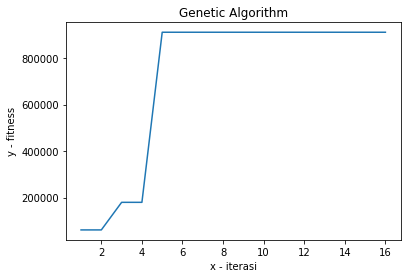


Generasi 17
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 2, 2, 0, 7]	x,y = (-4.97997997997998,-2.9279279279279278)	fitness = 12170.042227350259	Nilai fungsi = 0.000082168983584
Individu ke-4	 kromosom [0, 0, 0, 2, 0, 7]	x,y = (-5.0,-2.9279279279279278)	fitness = 6545.22774458569	Nilai fungsi = 0.000152783071731
Individu ke-5	 kromosom [0, 0, 8, 9, 0, 7]	x,y = (-4.91991991991992,4.079079079079079)	fitness = 113.44611428890566	Nilai fungsi = 0.008814757616584
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 91

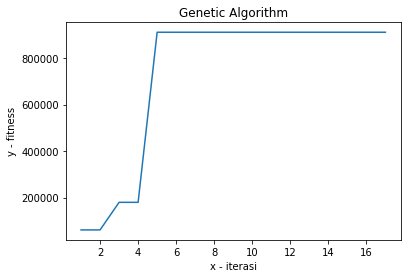


Generasi 18
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 3, 7]	x,y = (-4.91991991991992,-2.6276276276276276)	fitness = 381.4313367917369	Nilai fungsi = 0.002621703839048
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 6, 7]	x,y = (-4.91991991991992,-2.3273273273273274)	fitness = 109.05478715608966	Nilai fungsi = 0.009169702917935
Individu ke-7	 kromosom [0, 4, 8, 2, 0, 7]	x,y = (-4.51951951951952,-2.927927927927927

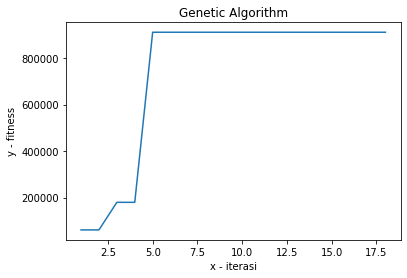


Generasi 19
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [2, 0, 8, 2, 0, 7]	x,y = (-2.9179179179179178,-2.92792792792792

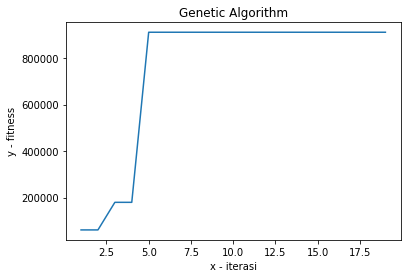


Generasi 20
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

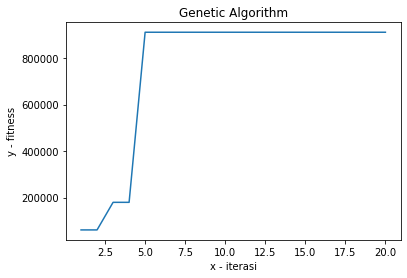


Generasi 21
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 3, 2, 0, 7]	x,y = (-4.96996996996997,-2.9279279279279278)	fitness = 18249.60257895767	Nilai fungsi = 0.000054795713807
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 8, 8, 2, 2, 7]	x,y = (-4.119119119119119,-2.7277277277277276)	fitness = 26.416467395569015	Nilai fungsi = 0.037855175146081
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.92792792792792

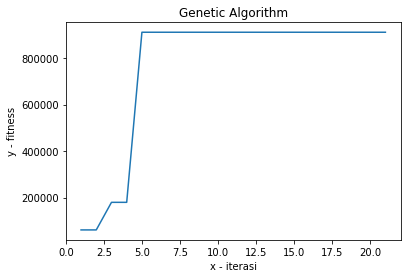


Generasi 22
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 4, 8, 2, 0, 7]	x,y = (-4.51951951951952,-2.9279279279279278)	fitness = 177.9191502024057	Nilai fungsi = 0.005620530442408
Individu ke-4	 kromosom [0, 0, 8, 8, 0, 7]	x,y = (-4.91991991991992,3.0780780780780788)	fitness = 463.66487179275924	Nilai fungsi = 0.002156730131686
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 0, 2, 0, 7]	x,y = (-5.0,-2.9279279279279278)	fitness = 6545.22774458569	Nilai fungsi = 0.000152783071731
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 91

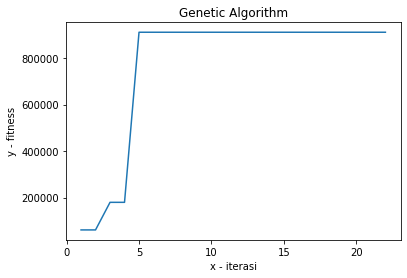


Generasi 23
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

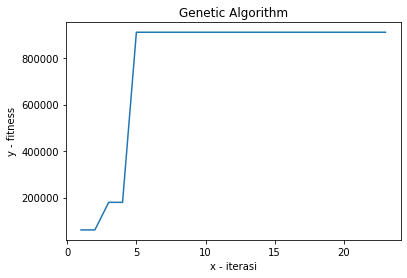


Generasi 24
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

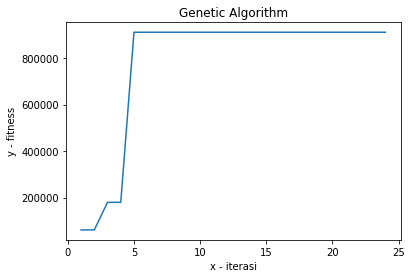


Generasi 25
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 7, 7]	x,y = (-4.91991991991992,-2.227227227227227)	fitness = 84.89649057452469	Nilai fungsi = 0.011779049913991
Individu ke-4	 kromosom [3, 0, 8, 2, 0, 7]	x,y = (-1.9169169169169162,-2.9279279279279278)	fitness = 40.29724881620121	Nilai fungsi = 0.024815589882105
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.927927927927927

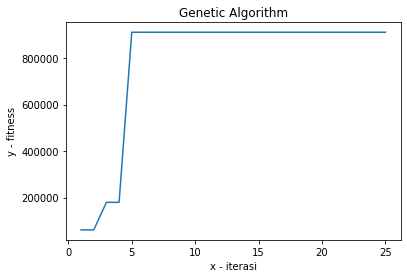


Generasi 26
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 3, 2, 0, 7]	x,y = (-4.96996996996997,-2.9279279279279278)	fitness = 18249.60257895767	Nilai fungsi = 0.000054795713807
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 3, 8, 2, 0, 7]	x,y = (-4.61961961961962,-2.9279279279279278)	fitness = 322.243491638395	Nilai fungsi = 0.003103243435316
Individu ke-7	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)

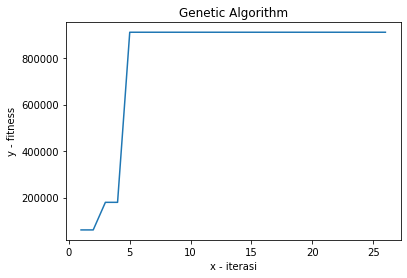


Generasi 27
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [9, 0, 5, 2, 0, 7]	x,y = (4.059059059059059,-2.9279279279279278)	fitness = 37.26392052228052	Nilai fungsi = 0.026835608974694
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

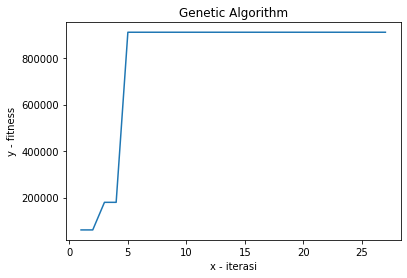


Generasi 28
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 7, 0, 7]	x,y = (-4.91991991991992,2.077077077077078)	fitness = 24.424103454797034	Nilai fungsi = 0.040943160998755
Individu ke-5	 kromosom [3, 4, 8, 8, 0, 7]	x,y = (-1.5165165165165164,3.0780780780780788)	fitness = 849.5728227281601	Nilai fungsi = 0.001177062134343
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

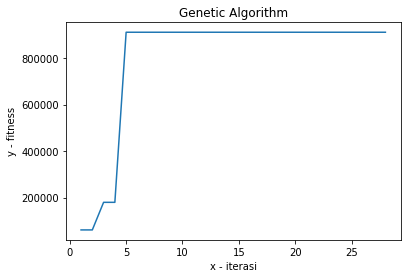


Generasi 29
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 0, 2, 0, 7]	x,y = (-5.0,-2.9279279279279278)	fitness = 6545.22774458569	Nilai fungsi = 0.000152783071731
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 91

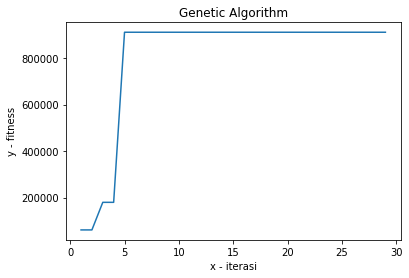


Generasi 30
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [9, 0, 8, 2, 0, 7]	x,y = (4.089089089089089,-2.9279279279279278)	fitness = 39.943190650827695	Nilai fungsi = 0.025035556341548
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [6, 0, 8, 2, 0, 7]	x,y = (1.0860860860860875,-2.9279279279279278)	fitness = 151.269674095035	Nilai fungsi = 0.006610710348802
Individu ke-7	 kromosom [0, 0, 8, 2, 7, 7]	x,y = (-4.91991991991992,-2.227227227227227

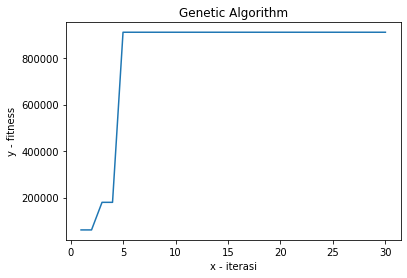


Generasi 31
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 5, 7]	x,y = (-4.91991991991992,-2.4274274274274275)	fitness = 149.33328086829232	Nilai fungsi = 0.006696430924075
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [5, 0, 8, 2, 0, 7]	x,y = (0.08508508508508505,-2.9279279279279

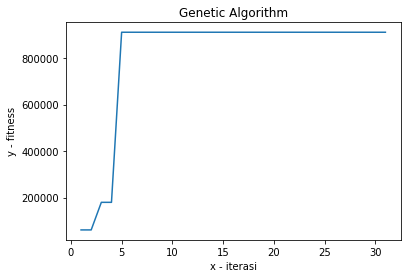


Generasi 32
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 7, 0, 7]	x,y = (-4.91991991991992,2.077077077077078)	fitness = 24.424103454797034	Nilai fungsi = 0.040943160998755
Individu ke-7	 kromosom [0, 8, 8, 2, 0, 7]	x,y = (-4.119119119119119,-2.9279279279279278

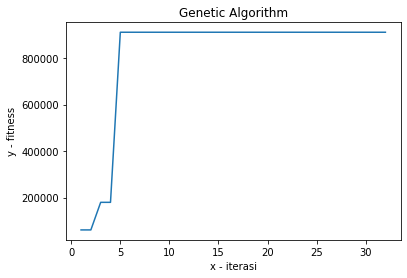


Generasi 33
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 3, 8, 5, 0, 7]	x,y = (-4.61961961961962,0.07507507507507505)	fitness = 68664.88334906874	Nilai fungsi = 0.000014563485019
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 3, 7]	x,y = (-4.91991991991992,-2.6276276276276276

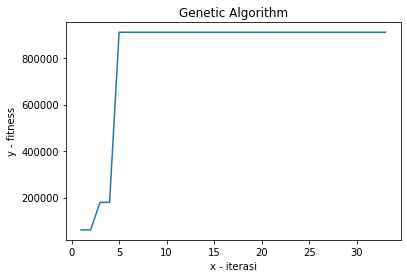


Generasi 34
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [6, 0, 8, 2, 0, 7]	x,y = (1.0860860860860875,-2.9279279279279278)	fitness = 151.269674095035	Nilai fungsi = 0.006610710348802
Individu ke-5	 kromosom [0, 0, 4, 2, 0, 7]	x,y = (-4.95995995995996,-2.9279279279279278)	fitness = 30449.827318450654	Nilai fungsi = 0.000032840908736
Individu ke-6	 kromosom [1, 0, 8, 2, 0, 7]	x,y = (-3.918918918918919,-2.9279279279279278)	fitness = 27.978699282388877	Nilai fungsi = 0.035741475681446
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279

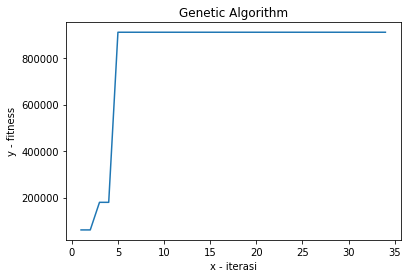


Generasi 35
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 9, 2, 0, 7]	x,y = (-4.90990990990991,-2.9279279279279278)	fitness = 130848.1487782479	Nilai fungsi = 0.000007642446678
Individu ke-4	 kromosom [0, 1, 8, 2, 6, 7]	x,y = (-4.81981981981982,-2.3273273273273274)	fitness = 74.52490620191054	Nilai fungsi = 0.013418332889822
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [8, 0, 8, 2, 0, 7]	x,y = (3.0880880880880888,-2.927927927927927

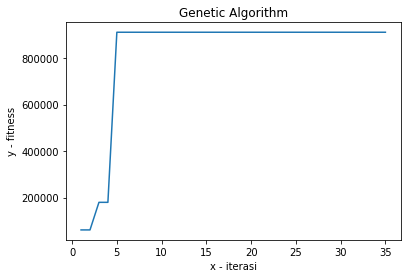


Generasi 36
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 6, 7]	x,y = (-4.91991991991992,-2.3273273273273274)	fitness = 109.05478715608966	Nilai fungsi = 0.009169702917935
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 3, 2, 0, 7]	x,y = (-4.96996996996997,-2.927927927927927

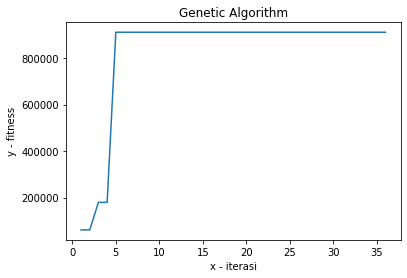


Generasi 37
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 6, 8, 2, 0, 7]	x,y = (-4.31931931931932,-2.9279279279279278)	fitness = 76.89573985661488	Nilai fungsi = 0.013004621606667
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 8, 0, 7]	x,y = (-4.91991991991992,3.0780780780780788)

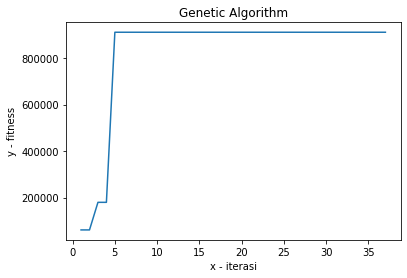


Generasi 38
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 6, 0, 7]	x,y = (-4.91991991991992,1.0760760760760766)	fitness = 21.499761545741897	Nilai fungsi = 0.046512143768313
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 3, 0, 7]	x,y = (-4.91991991991992,-1.9269269269269262

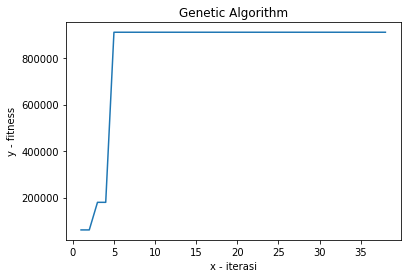


Generasi 39
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

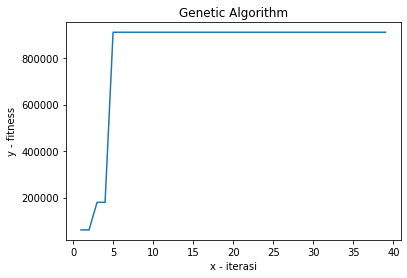


Generasi 40
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [6, 0, 8, 9, 0, 7]	x,y = (1.0860860860860875,4.079079079079079)	fitness = 154.02928375054555	Nilai fungsi = 0.006492271960568
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 8, 8, 2, 0, 7]	x,y = (-4.119119119119119,-2.927927927927927

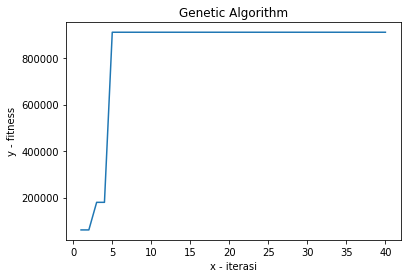


Generasi 41
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [6, 4, 8, 2, 0, 7]	x,y = (1.4864864864864877,-2.9279279279279278)	fitness = 659.8292952267562	Nilai fungsi = 0.001515543500772
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.927927927927927

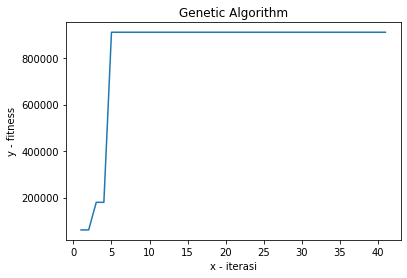


Generasi 42
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

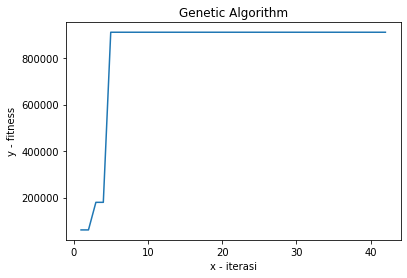


Generasi 43
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [4, 0, 8, 2, 0, 7]	x,y = (-0.9159159159159156,-2.9279279279279278)	fitness = 59.708744384292004	Nilai fungsi = 0.016747965650791
Individu ke-7	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279

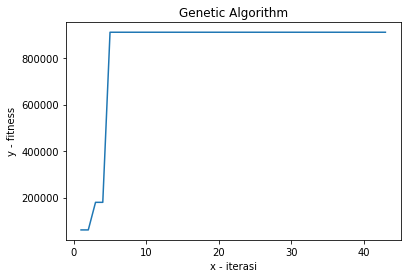


Generasi 44
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 6, 8, 0, 0, 7]	x,y = (-4.31931931931932,-4.92992992992993)	fitness = 122.00249406106731	Nilai fungsi = 0.008196553748315
Individu ke-4	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278)	fitness = 179615.08947523727	Nilai fungsi = 0.000005567460968
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 2, 7]	x,y = (-4.91991991991992,-2.7277277277277276)	fitness = 822.8797573938438	Nilai fungsi = 0.001215244379285
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

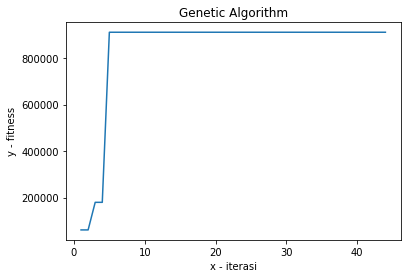


Generasi 45
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 8, 0, 7]	x,y = (-4.91991991991992,3.0780780780780788)	fitness = 463.66487179275924	Nilai fungsi = 0.002156730131686
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 3, 0, 7]	x,y = (-4.91991991991992,-1.9269269269269262)	fitness = 52.21702827345796	Nilai fungsi = 0.019150840885909
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

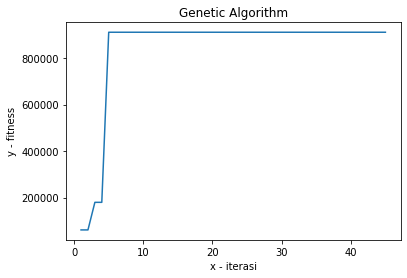


Generasi 46
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [4, 0, 8, 2, 4, 7]	x,y = (-0.9159159159159156,-2.527527527527527)	fitness = 6689.354401598715	Nilai fungsi = 0.000149491257297
Individu ke-6	 kromosom [0, 0, 7, 9, 0, 7]	x,y = (-4.92992992992993,4.079079079079079)	fitness = 117.52159345130458	Nilai fungsi = 0.008509074550749
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

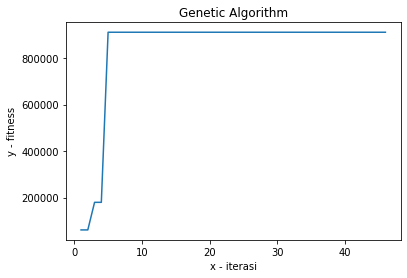


Generasi 47
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 3, 8, 2, 0, 7]	x,y = (-4.61961961961962,-2.9279279279279278)	fitness = 322.243491638395	Nilai fungsi = 0.003103243435316
Individu ke-5	 kromosom [4, 0, 8, 2, 0, 7]	x,y = (-0.9159159159159156,-2.9279279279279278)	fitness = 59.708744384292004	Nilai fungsi = 0.016747965650791
Individu ke-6	 kromosom [0, 5, 8, 2, 0, 7]	x,y = (-4.41941941941942,-2.9279279279279278)	fitness = 112.03969556770087	Nilai fungsi = 0.008925408043400
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279

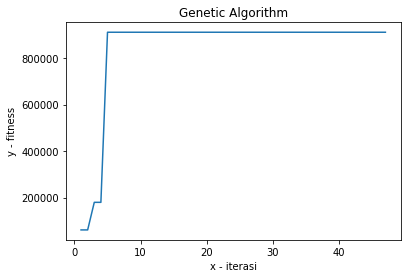


Generasi 48
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 4, 2, 0, 7]	x,y = (-4.95995995995996,-2.9279279279279278)	fitness = 30449.827318450654	Nilai fungsi = 0.000032840908736
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [9, 0, 8, 2, 0, 7]	x,y = (4.089089089089089,-2.927927927927927

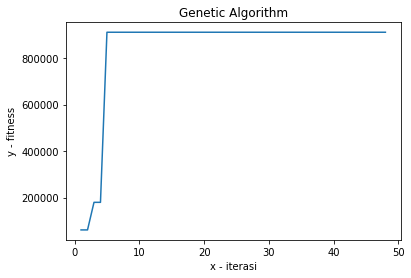


Generasi 49
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 3, 0, 7]	x,y = (-4.91991991991992,-1.9269269269269262)	fitness = 52.21702827345796	Nilai fungsi = 0.019150840885909
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

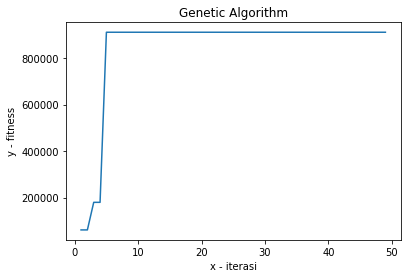


Generasi 50
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [5, 0, 8, 2, 0, 7]	x,y = (0.08508508508508505,-2.9279279279279278)	fitness = 13.946939585898269	Nilai fungsi = 0.071700317753660
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279

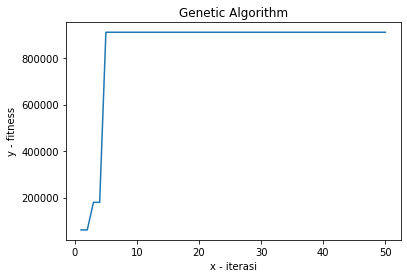


Generasi 51
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 4, 7]	x,y = (-4.91991991991992,-2.527527527527527)	fitness = 223.29566690126873	Nilai fungsi = 0.004478367242308
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 6, 9, 0, 7]	x,y = (-4.93993993993994,4.079079079079079)	fitness = 121.8012346423817	Nilai fungsi = 0.008210097401197
Individu ke-7	 kromosom [8, 0, 8, 2, 0, 7]	x,y = (3.0880880880880888,-2.9279279279279278)

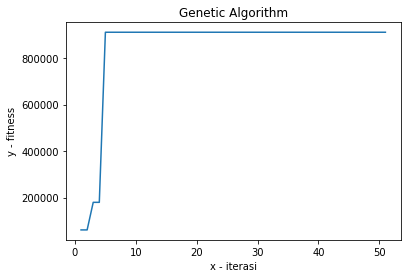


Generasi 52
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 1, 2, 0, 7]	x,y = (-4.98998998998999,-2.9279279279279278)	fitness = 8705.94486690076	Nilai fungsi = 0.000114864040066
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)

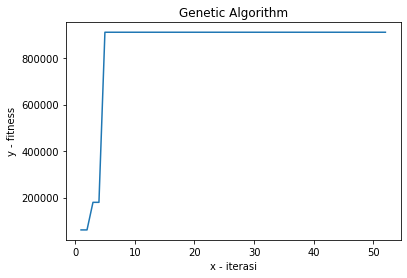


Generasi 53
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [5, 0, 8, 2, 0, 7]	x,y = (0.08508508508508505,-2.9279279279279278)	fitness = 13.946939585898269	Nilai fungsi = 0.071700317753660
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279

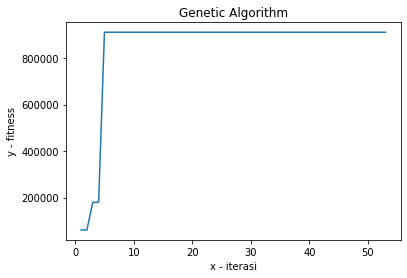


Generasi 54
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 4, 8, 2, 0, 7]	x,y = (-4.51951951951952,-2.9279279279279278)	fitness = 177.9191502024057	Nilai fungsi = 0.005620530442408
Individu ke-5	 kromosom [9, 0, 8, 2, 0, 7]	x,y = (4.089089089089089,-2.9279279279279278)	fitness = 39.943190650827695	Nilai fungsi = 0.025035556341548
Individu ke-6	 kromosom [0, 0, 8, 2, 4, 7]	x,y = (-4.91991991991992,-2.527527527527527)	fitness = 223.29566690126873	Nilai fungsi = 0.004478367242308
Individu ke-7	 kromosom [0, 0, 8, 4, 9, 7]	x,y = (-4.91991991991992,-0.025025025025025

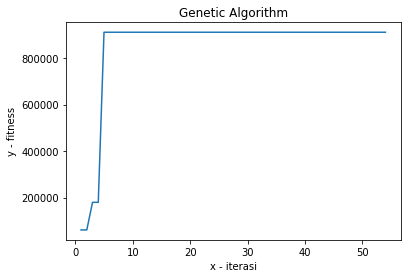


Generasi 55
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 2, 5, 2, 0, 7]	x,y = (-4.74974974974975,-2.9279279279279278)	fitness = 1020.1878512389711	Nilai fungsi = 0.000980211633363
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 8, 8, 2, 0, 7]	x,y = (-4.119119119119119,-2.9279279279279278)	fitness = 42.9514466261721	Nilai fungsi = 0.023282102898734
Individu ke-7	 kromosom [0, 4, 8, 2, 0, 7]	x,y = (-4.51951951951952,-2.927927927927927

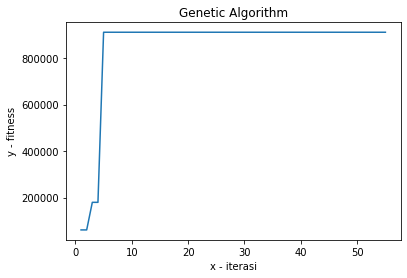


Generasi 56
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [7, 0, 8, 2, 0, 7]	x,y = (2.087087087087088,-2.9279279279279278)	fitness = 25.960547094728625	Nilai fungsi = 0.038519989442097
Individu ke-4	 kromosom [0, 4, 8, 2, 7, 7]	x,y = (-4.51951951951952,-2.227227227227227)	fitness = 26.22681066025273	Nilai fungsi = 0.038128921314688
Individu ke-5	 kromosom [0, 0, 8, 7, 0, 7]	x,y = (-4.91991991991992,2.077077077077078)	fitness = 24.424103454797034	Nilai fungsi = 0.040943160998755
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)

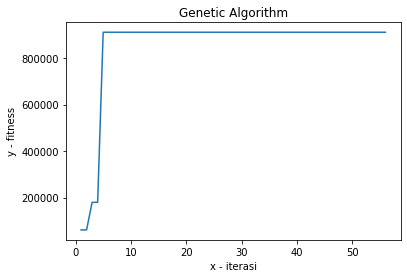


Generasi 57
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 2, 7]	x,y = (-4.91991991991992,-2.7277277277277276)	fitness = 822.8797573938438	Nilai fungsi = 0.001215244379285
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 4, 8, 2, 0, 7]	x,y = (-4.51951951951952,-2.9279279279279278

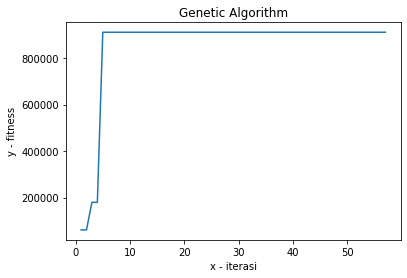


Generasi 58
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278

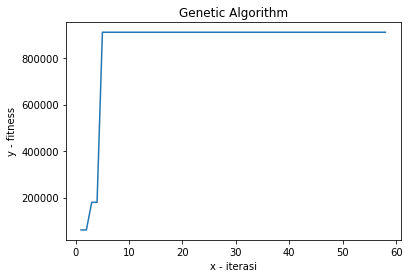


Generasi 59
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 5, 8, 2, 0, 7]	x,y = (-4.41941941941942,-2.9279279279279278)	fitness = 112.03969556770087	Nilai fungsi = 0.008925408043400
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.927927927927927

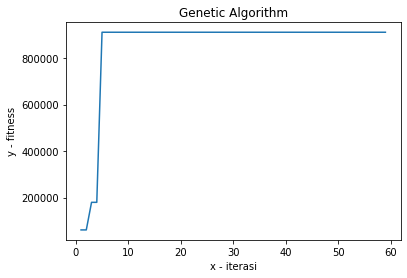


Generasi 60
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [1, 0, 8, 2, 0, 7]	x,y = (-3.918918918918919,-2.9279279279279278)	fitness = 27.978699282388877	Nilai fungsi = 0.035741475681446
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 9, 2, 6, 7]	x,y = (-4.90990990990991,-2.3273273273273274)	fitness = 104.71526250721386	Nilai fungsi = 0.009549706280220
Individu ke-6	 kromosom [5, 5, 6, 5, 0, 7]	x,y = (0.5655655655655663,0.07507507507507505)	fitness = 0.3851648187542402	Nilai fungsi = 2.596291123458148
Individu ke-7	 kromosom [0, 0, 0, 2, 0, 7]	x,y = (-5.0,-2.9279279279279278)	fitnes

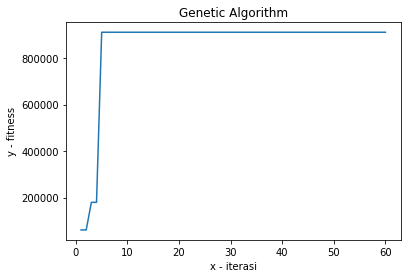


Generasi 61
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 4, 0, 7]	x,y = (-4.91991991991992,-0.9259259259259256)	fitness = 71.24062107249502	Nilai fungsi = 0.014036935458246
Individu ke-4	 kromosom [0, 0, 8, 2, 6, 7]	x,y = (-4.91991991991992,-2.3273273273273274)	fitness = 109.05478715608966	Nilai fungsi = 0.009169702917935
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.927927927927927

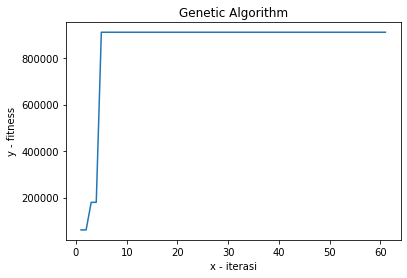


Generasi 62
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 7, 0, 7]	x,y = (-4.91991991991992,2.077077077077078)	fitness = 24.424103454797034	Nilai fungsi = 0.040943160998755
Individu ke-4	 kromosom [0, 6, 2, 2, 0, 7]	x,y = (-4.37937937937938,-2.9279279279279278)	fitness = 95.54828583663253	Nilai fungsi = 0.010465912509512
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-7	 kromosom [0, 0, 8, 5, 0, 7]	x,y = (-4.91991991991992,0.07507507507507505)

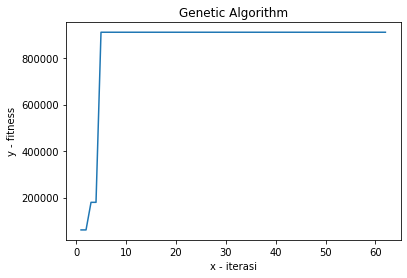


Generasi 63
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [7, 0, 0, 2, 9, 7]	x,y = (2.007007007007008,-2.0270270270270268)	fitness = 4.668337556812374	Nilai fungsi = 0.214209017199437
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

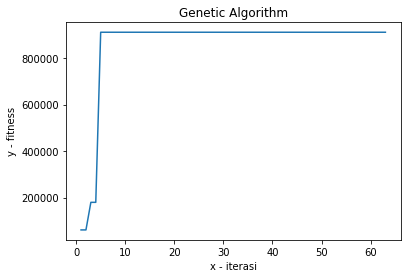


Generasi 64
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 2, 2, 5, 7]	x,y = (-4.97997997997998,-2.4274274274274275)	fitness = 201.19555251236386	Nilai fungsi = 0.004970288793727
Individu ke-4	 kromosom [2, 4, 8, 2, 0, 7]	x,y = (-2.517517517517517,-2.9279279279279278)	fitness = 14.232510401287671	Nilai fungsi = 0.070261673577244
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279

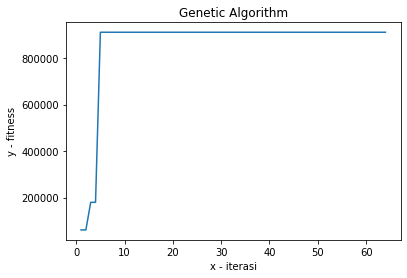


Generasi 65
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 5, 8, 2, 0, 7]	x,y = (-4.41941941941942,-2.9279279279279278)	fitness = 112.03969556770087	Nilai fungsi = 0.008925408043400
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.927927927927927

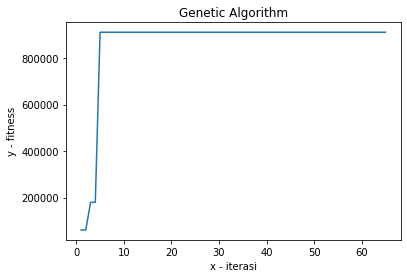


Generasi 66
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [3, 0, 8, 2, 0, 7]	x,y = (-1.9169169169169162,-2.9279279279279278)	fitness = 40.29724881620121	Nilai fungsi = 0.024815589882105
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [8, 0, 8, 2, 0, 7]	x,y = (3.0880880880880888,-2.9279279279279278)	fitness = 12.35622900912735	Nilai fungsi = 0.080930840571287
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279

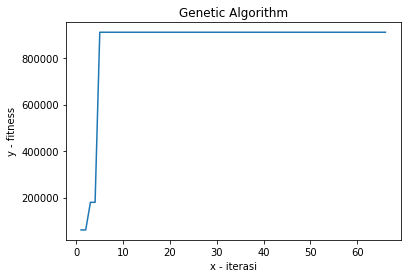


Generasi 67
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

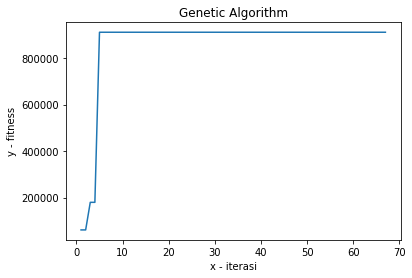


Generasi 68
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278

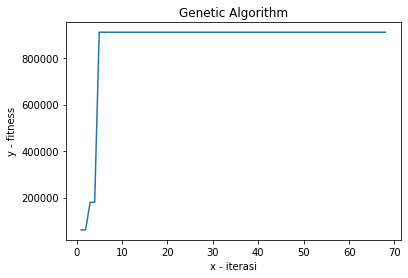


Generasi 69
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 1, 0, 7]	x,y = (-4.91991991991992,-3.928928928928929)	fitness = 47.39907229054746	Nilai fungsi = 0.021097459331486
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)

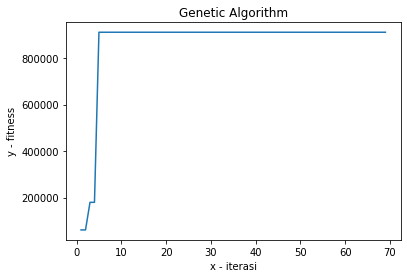


Generasi 70
Individu ke-1	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 6, 2, 0, 7]	x,y = (-4.93993993993994,-2.9279279279279278

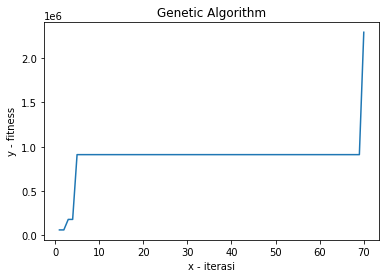


Generasi 71
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-3	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 7, 8, 2, 0, 7]	x,y = (-4.2192192192192195,-2.9279279279279278)	fitness = 56.13288777896349	Nilai fungsi = 0.017814868245114
Individu ke-6	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279

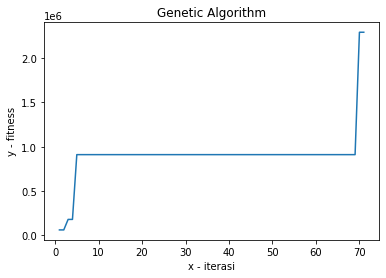


Generasi 72
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 8, 2, 0, 7]	x,y = (-4.91991991991992,-2.9279279279279278)	fitness = 911039.4540611331	Nilai fungsi = 0.000001097647303
Individu ke-5	 kromosom [0, 1, 7, 2, 0, 7]	x,y = (-4.82982982982983,-2.9279279279279278)	fitness = 3544.199443945839	Nilai fungsi = 0.000282151164407
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 5, 7, 2, 0, 7]	x,y = (-4.42942942942943,-2.927927927927

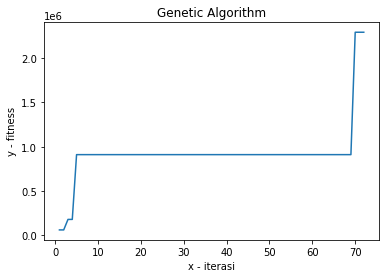


Generasi 73
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [2, 0, 7, 5, 0, 7]	x,y = (-2.9279279279279278,0.07507507507507505)	fitness = 10.537723754072658	Nilai fungsi = 0.094897154578902
Individu ke-5	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.927927927

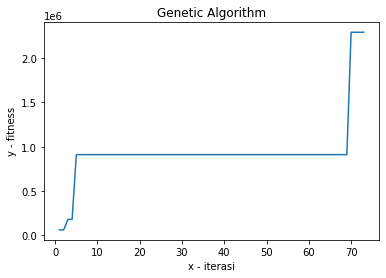


Generasi 74
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 8, 0, 7]	x,y = (-4.92992992992993,3.0780780780780788)	fitness = 433.01076891157516	Nilai fungsi = 0.002309411386035
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [7, 0, 7, 2, 0, 7]	x,y = (2.077077077077078,-2.92792792792

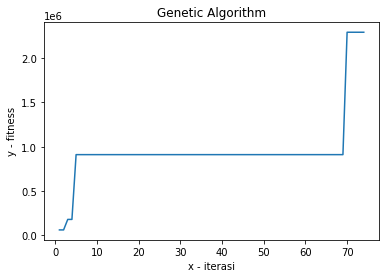


Generasi 75
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [7, 0, 8, 2, 0, 7]	x,y = (2.087087087087088,-2.9279279279279278)	fitness = 25.960547094728625	Nilai fungsi = 0.038519989442097
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279

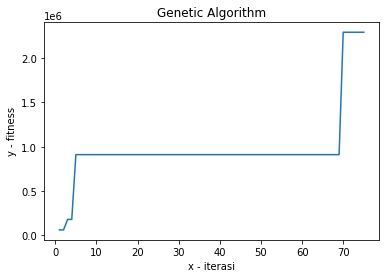


Generasi 76
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 6, 7]	x,y = (-4.92992992992993,-2.3273273273

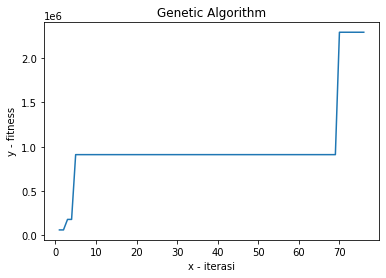


Generasi 77
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 6, 7, 2, 0, 7]	x,y = (-4.32932932932933,-2.9279279279279278)	fitness = 79.59977952919593	Nilai fungsi = 0.012562848866098
Individu ke-7	 kromosom [0, 0, 4, 2, 0, 7]	x,y = (-4.95995995995996,-2.92792792792

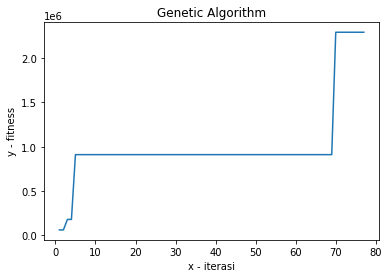


Generasi 78
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 9, 0, 7]	x,y = (-4.92992992992993,4.079079079079079)	fitness = 117.52159345130458	Nilai fungsi = 0.008509074550749
Individu ke-5	 kromosom [2, 0, 7, 2, 0, 7]	x,y = (-2.9279279279279278,-2.9279279279279278)	fitness = 12.121759208640736	Nilai fungsi = 0.082496276554246
Individu ke-6	 kromosom [0, 9, 2, 2, 0, 7]	x,y = (-4.079079079079079,-2.9279279279279278)	fitness = 39.01591329742283	Nilai fungsi = 0.025630567516820
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279

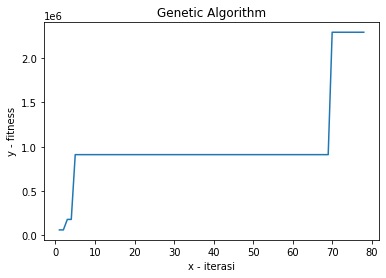


Generasi 79
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 1, 7, 2, 0, 7]	x,y = (-4.82982982982983,-2.9279279279279278)	fitness = 3544.199443945839	Nilai fungsi = 0.000282151164407
Individu ke-4	 kromosom [0, 0, 7, 7, 0, 7]	x,y = (-4.92992992992993,2.077077077077078)	fitness = 24.070651638210858	Nilai fungsi = 0.041544367598780
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 7, 4, 0, 7]	x,y = (-4.92992992992993,-0.9259259259259256)	fitness = 73.9402983555819	Nilai fungsi = 0.013524424735088
Individu ke-7	 kromosom [0, 0, 7, 9, 0, 7]	x,y = (-4.92992992992993,4.079079079079079)

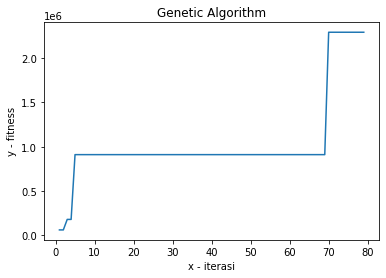


Generasi 80
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 4, 0, 7]	x,y = (-4.92992992992993,-0.9259259259259256)	fitness = 73.9402983555819	Nilai fungsi = 0.013524424735088
Individu ke-6	 kromosom [0, 0, 7, 8, 0, 7]	x,y = (-4.92992992992993,3.0780780780780788)	fitness = 433.01076891157516	Nilai fungsi = 0.002309411386035
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279

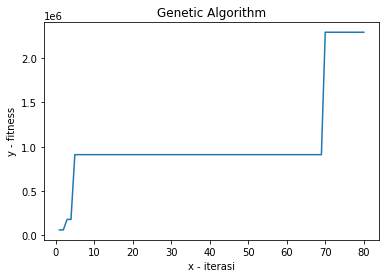


Generasi 81
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 3, 0, 7]	x,y = (-4.92992992992993,-1.9269269269269262)	fitness = 53.83252760599559	Nilai fungsi = 0.018576129423442
Individu ke-4	 kromosom [0, 0, 7, 1, 8, 7]	x,y = (-4.92992992992993,-3.128128128128128)	fitness = 832.4309210092382	Nilai fungsi = 0.001201300882466
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279

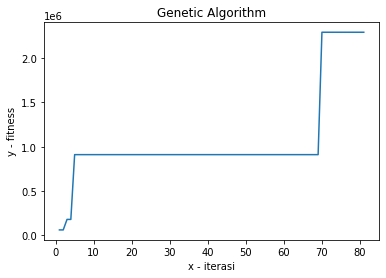


Generasi 82
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 2, 7, 2, 0, 7]	x,y = (-4.72972972972973,-2.9279279279279278)	fitness = 816.2428339411684	Nilai fungsi = 0.001225125610196
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.92792792792

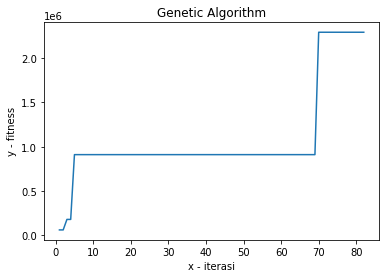


Generasi 83
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 5, 7]	x,y = (-4.92992992992993,-2.4274274274274275)	fitness = 156.57314887697606	Nilai fungsi = 0.006386791139940
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [2, 0, 7, 2, 0, 7]	x,y = (-2.9279279279279278,-2.92792792

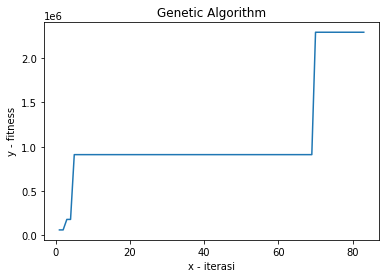


Generasi 84
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 6, 5, 7]	x,y = (-4.92992992992993,1.5765765765765778)	fitness = 18.12326011565996	Nilai fungsi = 0.055177710501209
Individu ke-6	 kromosom [0, 0, 0, 2, 0, 7]	x,y = (-5.0,-2.9279279279279278)	fitness = 6545.22774458569	Nilai fungsi = 0.000152783071731
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness =

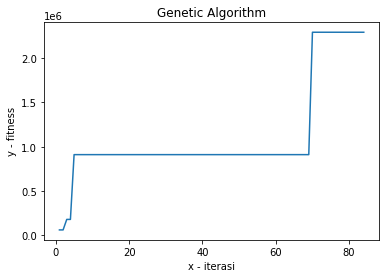


Generasi 85
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [5, 0, 7, 2, 0, 7]	x,y = (0.07507507507507505,-2.9279279279279278)	fitness = 13.915905189953005	Nilai fungsi = 0.071860219392841
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.92792792

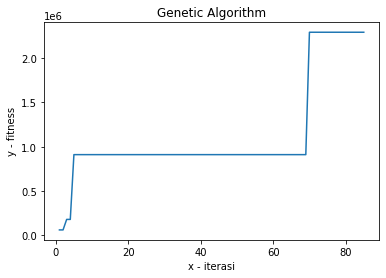


Generasi 86
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [7, 0, 7, 2, 0, 7]	x,y = (2.077077077077078,-2.9279279279279278)	fitness = 26.529144698681474	Nilai fungsi = 0.037694392765316
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279

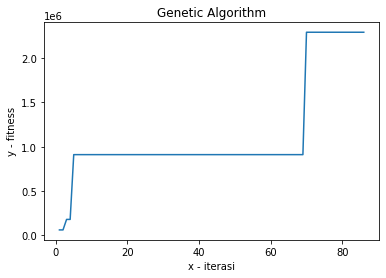


Generasi 87
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [1, 0, 7, 2, 0, 7]	x,y = (-3.928928928928929,-2.9279279279279278)	fitness = 28.503847340429076	Nilai fungsi = 0.035082983291930
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.927927927

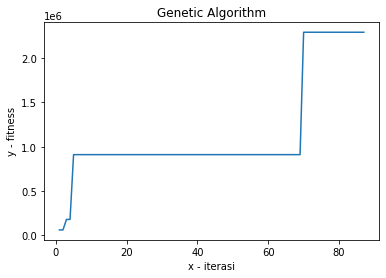


Generasi 88
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [2, 0, 6, 2, 0, 7]	x,y = (-2.937937937937938,-2.9279279279279278)	fitness = 12.120969220461173	Nilai fungsi = 0.082501653276367
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 8, 3, 2, 0, 7]	x,y = (-4.1691691691691695,-2.9279279279279278)	fitness = 48.84676010216321	Nilai fungsi = 0.020472186853509
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.92792792

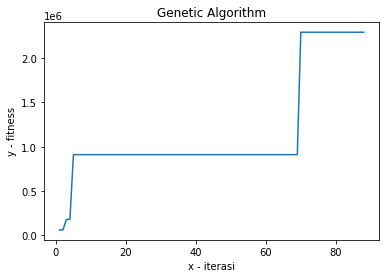


Generasi 89
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 3, 2, 0, 7]	x,y = (-4.96996996996997,-2.9279279279279278)	fitness = 18249.60257895767	Nilai fungsi = 0.000054795713807
Individu ke-4	 kromosom [3, 0, 7, 3, 0, 7]	x,y = (-1.9269269269269262,-1.9269269269269262)	fitness = 4.491009425298021	Nilai fungsi = 0.222667090023673
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 3, 7, 2, 0, 7]	x,y = (-4.62962962962963,-2.9279279279279278)	fitness = 345.4846392004018	Nilai fungsi = 0.002894484693486
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.92792792792

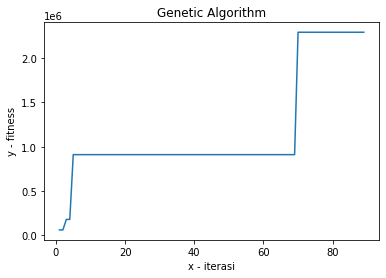


Generasi 90
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [3, 0, 7, 2, 0, 7]	x,y = (-1.9269269269269262,-2.9279279279279278)	fitness = 39.07991185070986	Nilai fungsi = 0.025588594053644
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.927927927

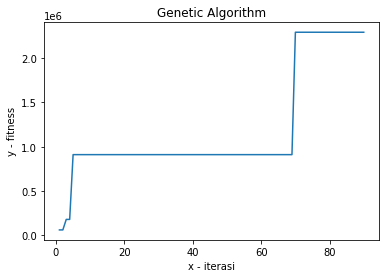


Generasi 91
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 9, 7, 2, 0, 7]	x,y = (-4.029029029029029,-2.927927927

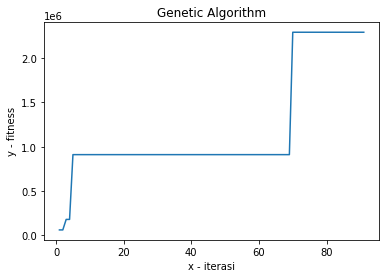


Generasi 92
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 3, 7, 2, 0, 7]	x,y = (-4.62962962962963,-2.9279279279279278)	fitness = 345.4846392004018	Nilai fungsi = 0.002894484693486
Individu ke-5	 kromosom [0, 8, 7, 2, 0, 7]	x,y = (-4.129129129129129,-2.9279279279279278)	fitness = 44.03626369085157	Nilai fungsi = 0.022708556907105
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 4, 7, 2, 0, 7]	x,y = (-4.52952952952953,-2.92792792792

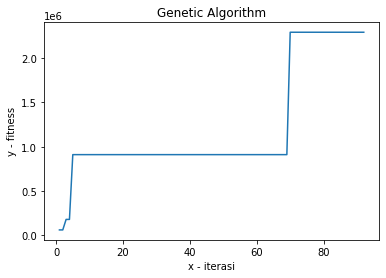


Generasi 93
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [2, 0, 7, 2, 0, 7]	x,y = (-2.9279279279279278,-2.9279279279279278)	fitness = 12.121759208640736	Nilai fungsi = 0.082496276554246
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 9, 0, 7]	x,y = (-4.92992992992993,4.079079079079079)	fitness = 117.52159345130458	Nilai fungsi = 0.008509074550749
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [2, 0, 7, 2, 0, 7]	x,y = (-2.9279279279279278,-2.92792792

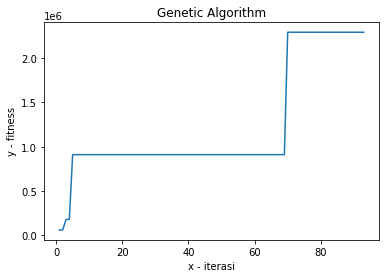


Generasi 94
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 7, 0, 7]	x,y = (-4.92992992992993,2.077077077077078)	fitness = 24.070651638210858	Nilai fungsi = 0.041544367598780
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 6, 6, 2, 0, 7]	x,y = (-4.33933933933934,-2.9279279279279278)	fitness = 82.45063718833043	Nilai fungsi = 0.012128469034337
Individu ke-6	 kromosom [0, 0, 9, 2, 0, 7]	x,y = (-4.90990990990991,-2.9279279279279278)	fitness = 130848.1487782479	Nilai fungsi = 0.000007642446678
Individu ke-7	 kromosom [0, 0, 7, 9, 0, 7]	x,y = (-4.92992992992993,4.079079079079079

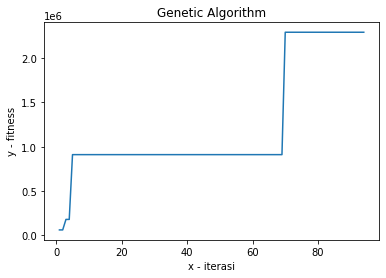


Generasi 95
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 5, 0, 7]	x,y = (-4.92992992992993,0.07507507507507505)	fitness = 287.40384454815313	Nilai fungsi = 0.003479424576147
Individu ke-6	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279

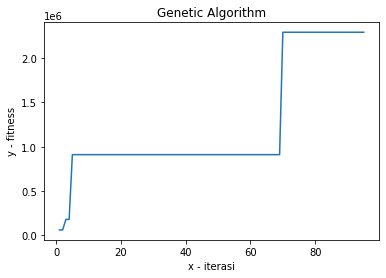


Generasi 96
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 5, 7, 2, 0, 7]	x,y = (-4.42942942942943,-2.9279279279279278)	fitness = 116.82754684356387	Nilai fungsi = 0.008559625080025
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279

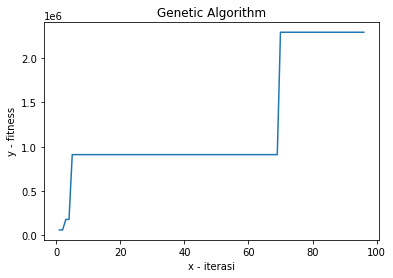


Generasi 97
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 9, 7]	x,y = (-4.92992992992993,-2.0270270270270268)	fitness = 61.10669191167994	Nilai fungsi = 0.016364819772036
Individu ke-4	 kromosom [0, 0, 7, 7, 0, 7]	x,y = (-4.92992992992993,2.077077077077078)	fitness = 24.070651638210858	Nilai fungsi = 0.041544367598780
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 3, 2, 0, 7]	x,y = (-4.96996996996997,-2.9279279279279278)	fitness = 18249.60257895767	Nilai fungsi = 0.000054795713807
Individu ke-7	 kromosom [0, 1, 7, 2, 0, 7]	x,y = (-4.82982982982983,-2.92792792792792

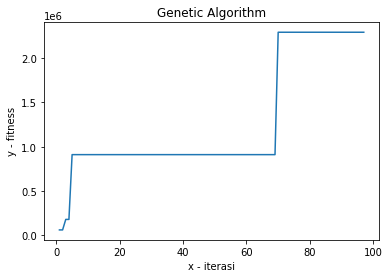


Generasi 98
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 4, 0, 7]	x,y = (-4.92992992992993,-0.9259259259259256)	fitness = 73.9402983555819	Nilai fungsi = 0.013524424735088
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 3, 0, 7]	x,y = (-4.92992992992993,-1.9269269269269262)	fitness = 53.83252760599559	Nilai fungsi = 0.018576129423442
Individu ke-6	 kromosom [0, 0, 7, 2, 2, 7]	x,y = (-4.92992992992993,-2.7277277277277276)	fitness = 914.4167439641362	Nilai fungsi = 0.001093593273090
Individu ke-7	 kromosom [0, 0, 7, 1, 0, 7]	x,y = (-4.92992992992993,-3.92892892892892

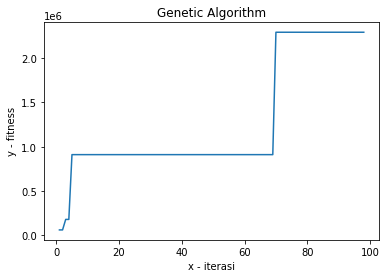


Generasi 99
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 9, 8, 7]	x,y = (-4.92992992992993,4.87987987987988)	fitness = 81.11878223637432	Nilai fungsi = 0.012327601234028
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 8, 7, 2, 0, 7]	x,y = (-4.129129129129129,-2.9279279279279278)	fitness = 44.03626369085157	Nilai fungsi = 0.022708556907105
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.92792792792792

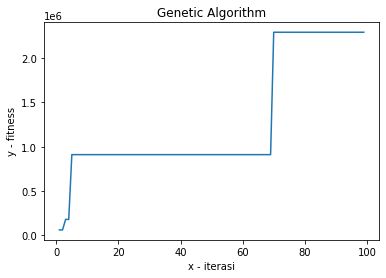


Generasi 100
Individu ke-1	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-2	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-3	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-4	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-5	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279279278)	fitness = 2293089.5055389293	Nilai fungsi = 0.000000436092877
Individu ke-6	 kromosom [0, 0, 5, 2, 0, 7]	x,y = (-4.94994994994995,-2.9279279279279278)	fitness = 60975.36135700079	Nilai fungsi = 0.000016400066810
Individu ke-7	 kromosom [0, 0, 7, 2, 0, 7]	x,y = (-4.92992992992993,-2.9279279279

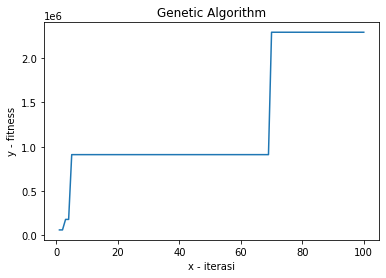



Individu terbaik --> Kromosom [0, 0, 7, 2, 0, 7]	Nilai x,y = -4.92992992992993,-2.9279279279279278	Fitness = 2293089.5055389293	Nilai fungsi = 4.36092877135634e-07


In [11]:
population = []
populati = []
plotx = []
ploty = []
enkode = input('Apakah kromosom di enkode ke representasi lain? true false? : ')
if enkode == "true" :
  gtype_len = int(input('Masukkan panjang genotype : '))
else :
  gtype_len = 2
population_size = int(input('Masukkan banyak individu dalam 1 populasi : '))
cross_prob = float(input('Masukkan probabilitas mating cross : '))
mutate_prob = float(input('Masukkan probabilitas mutasi : '))
generation = int(input('Masukkan banyak generasi : '))

for i in range(1,generation+1) :
  populati = generation_replace(populati)
  population = copy.deepcopy(populati) #copy populasi untuk di print yang sudah terurut
  #selection_sort(population)
  print("\nGenerasi {}".\
        format(i))
  for n in range(0,population_size) :
    print("Individu ke-{0}\t kromosom {1}\tx,y = ({2},{3})\tfitness = {4}\tNilai fungsi = {5:10.15f}".\
          format(n+1 ,population[n].kromosom, population[n].decode_gen("x"), population[n].decode_gen("y"), population[n].fitness, (1/population[n].fitness)))
  best_case = population[maxfit(population)]
  ploty.append(best_case.fitness)
  plotx.append(i)
  plt.plot(plotx,ploty)
  plt.xlabel('x - iterasi')
  plt.ylabel('y - fitness')
  plt.title('Genetic Algorithm')
  plt.show()

print("\n\nIndividu terbaik --> Kromosom {}\tNilai x,y = {},{}\tFitness = {}\tNilai fungsi = {}".\
      format(best_case.kromosom, best_case.decode_gen("x"), best_case.decode_gen("y"), best_case.fitness, 1/best_case.fitness))